In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i)) 
processed_data = processed_data.drop(to_drop, 1).drop('label', 1)
processed_data = processed_data.replace(0, 'A')\
                              .replace(1, 'T')\
                              .replace(2, 'C')\
                              .replace(3, 'G')
processed_data = pd.get_dummies(processed_data)
processed_data=pd.concat((processed_data, data['label']), axis = 1)
data = processed_data
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.33, 
                                                    random_state = 2)

# Деревья решений

In [8]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = None)
tree_model.fit(X, y)
tree_model.get_params(deep = True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [4]:
print(np.mean(tree_model.predict(X) != y))
print(np.mean(tree_model.predict(X_test) != y_test))

0.0
0.236111111111


In [11]:
from sklearn.model_selection import GridSearchCV
depth_array = np.arange(1, 100)
tree_model = tree.DecisionTreeClassifier()
grid = GridSearchCV(tree_model, param_grid = {'max_depth': depth_array}, cv = 5)
grid.fit(X, y)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.max_depth
print(min_err_cv)
print(argmin_err_cv)

0.238184079602
82


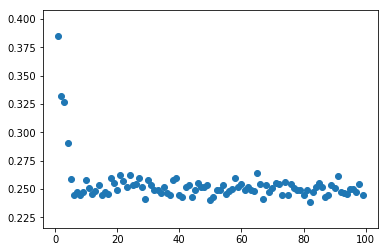

In [96]:
score = 1 - np.array([i for i in grid.cv_results_['mean_test_score']])
depth = np.array([i['max_depth'] for i in grid.cv_results_['params']])
plt.scatter(depth, score)